# Лабораторная работа №4 - Генерирование случайных величин с нормальным законом распределения

### Вариант 14

Составить подпрограмму генерирования случайных величин в соответствии с вариантом задания 14:

Нормальный закон, то есть:
* $\mu = 0$
* $\sigma^2 = 1$

N(1, 0,7), то есть:
* $\mu = 1$
* $\sigma^2 = 0,7$

По полученной с помощью подпрограммы выборке:
* Построить гистограмму частот;
* Статистическая функция распределения;
* Оценить матожидание случайной величины;
* Оценить дисперсию случайной величины;
* Проверить соответствие эмперических данных теоретическому распределению проверить с помощью критерия Пирсона или Колмогорова.

Объем выборки - не менее 1000.
Количество интервалов разбиения - $k = 15$ или $k = 25$.

Способ построения - метод Бокса и Маллера.

In [25]:
import math
import random

import numpy as np
import scipy.stats as sp
import pandas as pd
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = [12, 6]
import matplotlib; matplotlib.style.use('ggplot')

In [26]:
n = 300000 # Объем выборки
k = 25     # Интервалов разбиения
μ = 1      # Математическое ожидание
σ = 0.7    # Дисперсия

In [27]:
class NormalDistributionGenerator:
    def __init__(self):
        self.μ1 = 0
        self.μ2 = 1
        self.σ1 = 1
        self.σ2 = 0.7

    def generate_bm(self):
        r1 = random.random()
        r2 = random.random()
        
        x = math.sqrt(-2 * math.log(r1)) * math.cos(2 * math.pi * r2)
        x = self.μ1 + x * math.sqrt(self.σ1)
        y = math.sqrt(-2 * math.log(r1)) * math.sin(2 * math.pi * r2)
        y = self.μ2 + y * math.sqrt(self.σ2)

        return [x, y]

    def generate_clt(self):
        s = 0

        for j in range(12):
            s += random.random()

        x = s - 6
        x = self.μ2 + x * math.sqrt(self.σ2)

        return [0, x]

    def generate_sample(self, n, is_bm=True):
        my_dict = {}
        fn = self.generate_bm if is_bm else self.generate_clt

        sample = [fn() for i in range(n)]
        my_dict["x"] = [sample[i][0] for i in range(n)]
        my_dict["y"] = [sample[i][1] for i in range(n)]

        return my_dict

In [28]:
theoretical_sample = pd.Series(np.random.normal(μ, math.sqrt(σ), n))

## Метод Бокса и Маллера

In [29]:
generator = NormalDistributionGenerator()
sample0 = pd.DataFrame(generator.generate_sample(n))

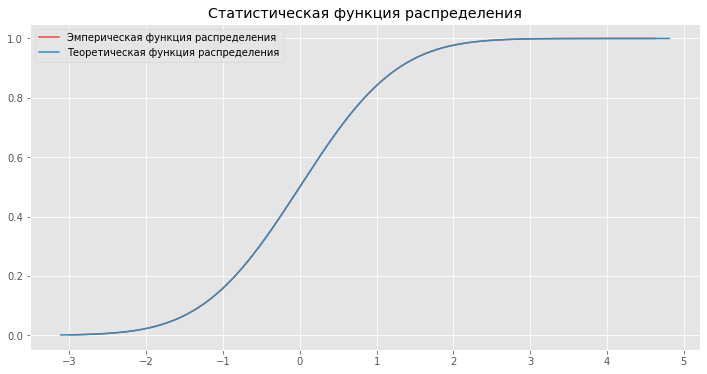

In [30]:
plt.title("Статистическая функция распределения")
plt.plot(sample0.y.sort_values(), sp.norm.cdf(sample0.y.sort_values()), label="Эмперическая функция распределения")
plt.plot(theoretical_sample.sort_values(), sp.norm.cdf(theoretical_sample.sort_values()), label="Теоретическая функция распределения")
plt.legend()
plt.show()

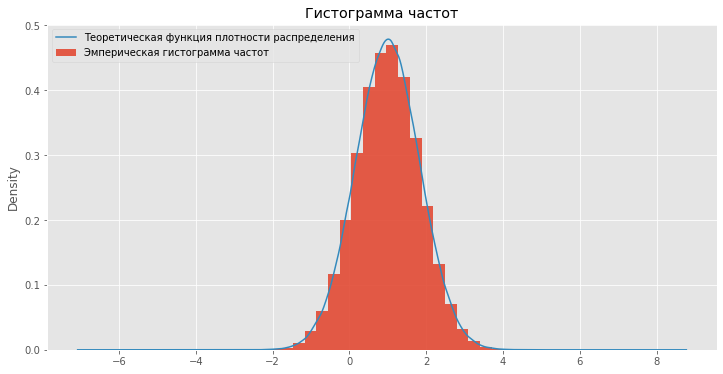

In [31]:
sample0.y.plot.hist(bins=k, title="Гистограмма частот", alpha=0.9, density=True, label="Эмперическая гистограмма частот")
theoretical_sample.plot.density(label="Теоретическая функция плотности распределения")
plt.legend(loc="upper left")

In [35]:
print(f"Математическое ожидание: μ = {sample0.y.mean()}")

Математическое ожидание: μ = 0.9996390338250397


In [36]:
print(f"Дисперсия: σ² = {sample0.y.var()}")

Дисперсия: σ² = 0.7001832425476895


In [44]:
λ, p = sp.ks_2samp(np.histogram(sample0, bins=k)[0], np.histogram(theoretical_sample, bins=k)[0])

print(f"""
λ = {λ}
""")


λ = 0.28



## Использование центральной предельной теоремы

In [38]:
sample1 = pd.DataFrame(generator.generate_sample(n, is_bm=False))

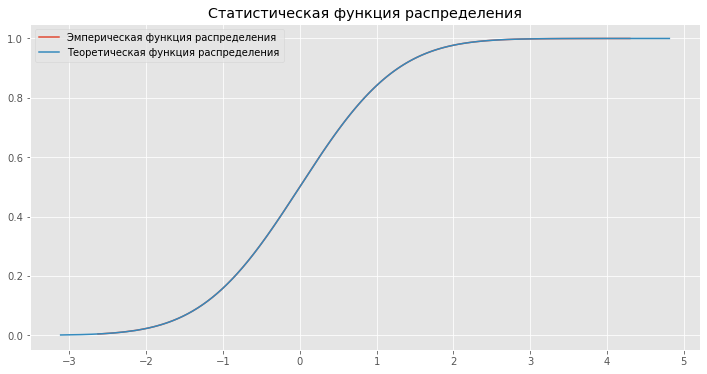

In [39]:
plt.title("Статистическая функция распределения")
plt.plot(sample1.y.sort_values(), sp.norm.cdf(sample1.y.sort_values()), label="Эмперическая функция распределения")
plt.plot(theoretical_sample.sort_values(), sp.norm.cdf(theoretical_sample.sort_values()), label="Теоретическая функция распределения")
plt.legend()
plt.show()

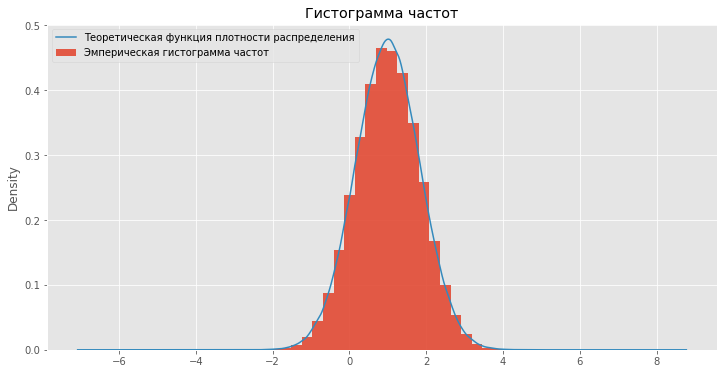

In [40]:
sample1.y.plot.hist(bins=k, title="Гистограмма частот", alpha=0.9, density=True, label="Эмперическая гистограмма частот")
theoretical_sample.plot.density(label="Теоретическая функция плотности распределения")
plt.legend(loc="upper left")

In [41]:
print(f"Математическое ожидание: μ = {sample1.y.mean()}")

Математическое ожидание: μ = 1.002796708146192


In [42]:
print(f"Дисперсия: σ² = {sample1.y.var()}")

Дисперсия: σ² = 0.6989185044718733


In [43]:
λ, p = sp.ks_2samp(np.histogram(sample1, bins=k)[0], np.histogram(theoretical_sample, bins=k)[0])

print(f"""
λ = {λ}
""")


λ = 0.12

